# Breast cancer analysis using Ludwig

In [1]:
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data from local directory
breast_cancer_dataset = pd.read_csv('./breast_cancer_dataset.csv')

In [3]:
# Split data for training and testing
from sklearn.model_selection import train_test_split

split = 0.3
breast_cancer_dataset_train, breast_cancer_dataset_test = train_test_split(breast_cancer_dataset, 
                                                                           test_size=split)
X_test = breast_cancer_dataset_test.drop(columns='label')
Y_test = breast_cancer_dataset_test['label']

In [4]:
# Train locally defined Ludwig model
from ludwig.api import LudwigModel

start_time = time.time()
model = LudwigModel(model_definition_file='./LudwigModelDefinitionFile.yml')
train_stats = model.train(data_df=breast_cancer_dataset_train,
                          skip_save_model=True, 
                          skip_save_processed_input=True, 
                          skip_save_training_statistics=True, 
                          skip_save_training_description=True, 
                          skip_save_log=True, 
                          skip_save_progress=True)
training_time = time.time() - start_time

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
targets is deprecated, use labels instead


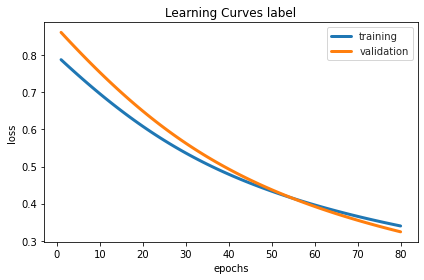

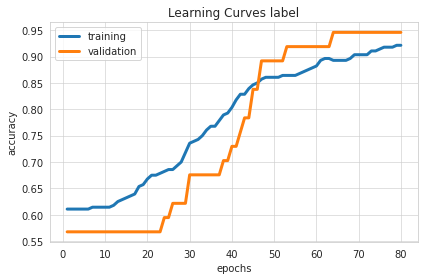

In [5]:
# Visualize training statistics
from ludwig.visualize import learning_curves

learning_curves(train_stats, output_feature_name='label')

In [6]:
# Predict and print statistics
pred = model.predict(data_df=X_test)
predictions = pred['label_predictions']
Y_test = Y_test == 1  # Change labels from 0/1 to False/True

pred_correct = []
for i in range(1, len(Y_test)):
    pred_correct.append(predictions.iloc[i-1] == Y_test.iloc[i-1])

print("No. of correct predictions = {}".format(sum(pred_correct)))
print("No. of incorrect predictions = {}".format(len(Y_test)-sum(pred_correct)))
print("Training time = {} seconds".format(round(training_time,2)))

model.close()

No. of correct predictions = 158
No. of incorrect predictions = 13
Training time = 2.16 seconds
